### **Importação das bibliotecas**

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

### **Importaçõa e Holdout do dataset**

In [56]:
file_path = 'modified_star_classification.csv'

In [66]:
df = pd.read_csv(file_path)

y = df['class']
X = df.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

### **Abordagem 1: 40/60**

In [58]:
first_model = MLPClassifier(
    hidden_layer_sizes=(32, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
)

first_model.fit(X_train_std, y_train)

y_pred = first_model.predict(X_test_std)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1-Score: {f1_weighted:.4f}')

Acurácia: 0.9706
Precisão: 0.9705
Revocação: 0.9706
F1-Score: 0.9704


### **Abordagem 2: Downsampling**

**Balanceando as classes**

In [67]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X.columns, index=X_train.index)
X_test_std_df = pd.DataFrame(X_test_std, columns=X.columns, index=X_test.index)
train_df = pd.concat([X_train_std_df, y_train], axis=1)

class_counts = train_df['class'].value_counts()

min_count = class_counts.min()

min_count = class_counts.min()
balanced_dfs = []

for class_name in class_counts.index:
    class_df = train_df[train_df['class'] == class_name]
    balanced_dfs.append(class_df.sample(min_count, random_state=42))

balanced_train_df = pd.concat(balanced_dfs)

X_train_balanced = balanced_train_df.drop('class', axis=1)
y_train_balanced = balanced_train_df['class']


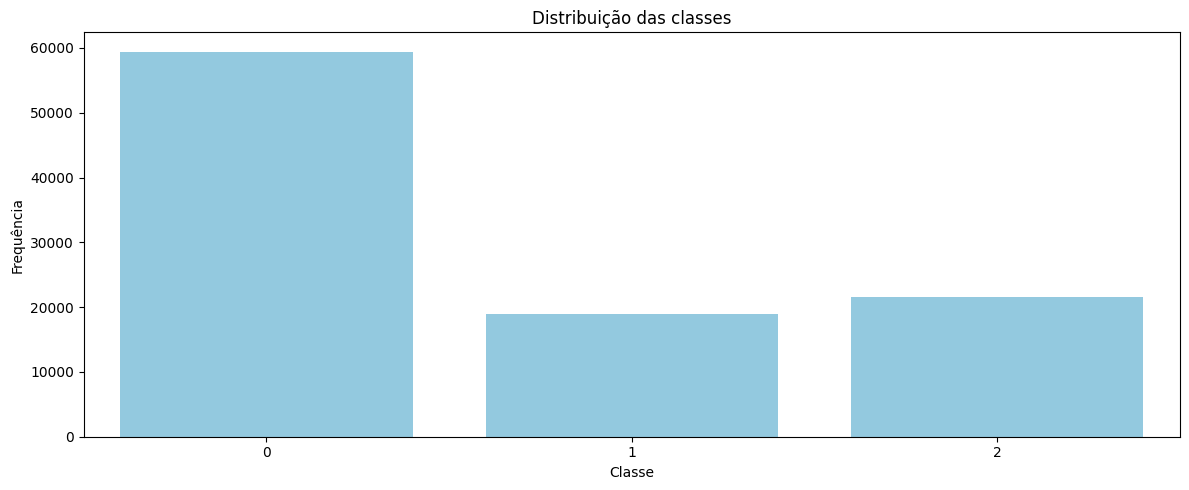

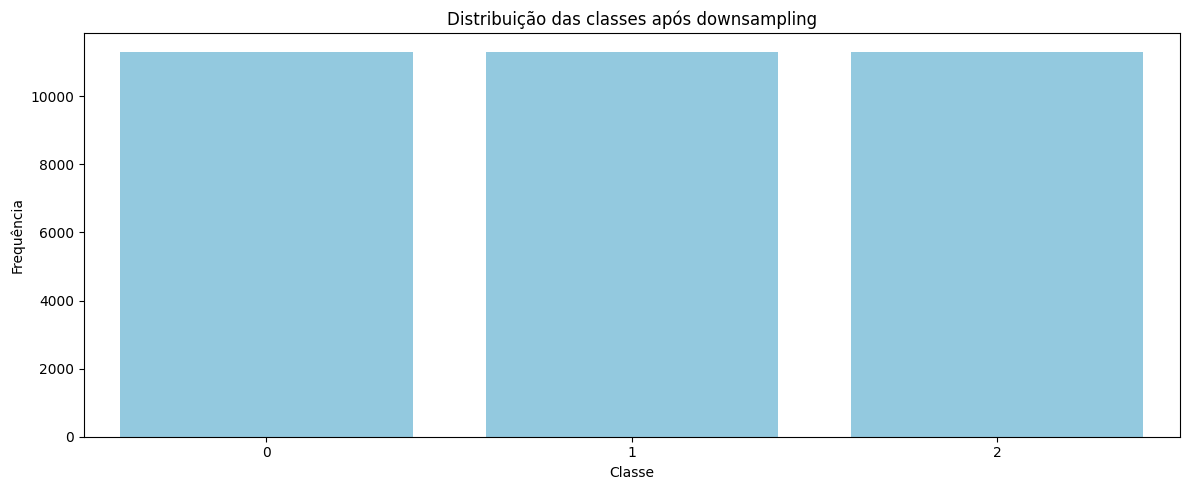

In [68]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='class', color='skyblue')
plt.title(f'Distribuição das classes')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(12, 5))
sns.countplot(data=balanced_train_df, x='class', color='skyblue')
plt.title(f'Distribuição das classes após downsampling')
plt.xlabel('Classe')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()
print()

**Treinamento**

In [70]:
second_model = MLPClassifier(
    hidden_layer_sizes=(32, 64),
    activation='relu',
    solver='adam',
    alpha=0.001,
    learning_rate_init=0.001,
    n_iter_no_change=10,
    max_iter=200,
    random_state=42,
    early_stopping=True
)

second_model.fit(X_train_balanced, y_train_balanced)

y_pred = second_model.predict(X_test_std_df)

In [71]:
accuracy_down = accuracy_score(y_test, y_pred)
precision_down = precision_score(y_test, y_pred, average='weighted')
recall_down = recall_score(y_test, y_pred, average='weighted')
f1_weighted_down = f1_score(y_test, y_pred, average='weighted')

print(f'Acurácia: {accuracy_down:.4f}')
print(f'Precisão: {precision_down:.4f}')
print(f'Revocação: {recall_down:.4f}')
print(f'F1-Score: {f1_weighted_down:.4f}')

Acurácia: 0.9691
Precisão: 0.9693
Revocação: 0.9691
F1-Score: 0.9692
